In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
from sklearn import datasets
from sklearn import metrics as m
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
from itertools import combinations
from sklearn import datasets
from sklearn import metrics as m
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
from itertools import combinations
from sklearn.svm import SVC
import xgboost as xgb
from thundersvm import SVC as svmgpu
from sklearn.utils import shuffle
import itertools
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import LabelEncoder
import random

randomseed = 10
np.random.seed(randomseed)

<IPython.core.display.Javascript object>

In [3]:
def swapcolumns(trainval, testval, coldindexval):
    trainval[trainval != coldindexval] = 5
    testval[testval != coldindexval] = 5

    trainval[trainval == coldindexval] = 0
    trainval[trainval == 5] = 1

    testval[testval == coldindexval] = 0
    testval[testval == 5] = 1

    return trainval, testval

<IPython.core.display.Javascript object>

In [4]:
# data = pd.read_csv("../dataset/seeds_dataset.txt", sep="\t", header=None)
# data = shuffle(data)

# le = LabelEncoder()
# data.iloc[:, -1] = le.fit_transform(data.iloc[:, -1])
# x = data.iloc[:, :-1]
# y = data.iloc[:, -1]
# print(np.unique(y))

<IPython.core.display.Javascript object>

In [5]:
# data = datasets.load_iris()
# x = data.data
# y = data.target.ravel()
# print(np.unique(y))

<IPython.core.display.Javascript object>

In [6]:
# xtrain, xtest, ytrain_original, ytest_original = train_test_split(
#     x, y, test_size=0.3, random_state=10
# )

<IPython.core.display.Javascript object>

In [7]:
randomseed = 10
np.random.seed(randomseed)

xtest = np.array(pd.read_csv("../dataset/xtest.txt"))
xtrain = np.array(pd.read_csv("../dataset/xtrain.txt"))
ytest_original = np.array(pd.read_csv("../dataset/ytest.txt")).ravel()
ytrain_original = np.array(pd.read_csv("../dataset/ytrain.txt")).ravel()

ytrain = ytrain_original.copy()
ytest = ytest_original.copy()

<IPython.core.display.Javascript object>

In [8]:
xgbmodel = xgb.XGBClassifier(random_state=randomseed)
xgbmodel.fit(xtrain, ytrain_original)
print(m.accuracy_score(ytest_original, xgbmodel.predict(xtest)))

0.735


<IPython.core.display.Javascript object>

In [9]:
# cvscore = cross_val_score(xgbmodel, x, y, cv=10)
# print("mean= ", np.mean(cvscore), ", std= ", np.std(cvscore))

<IPython.core.display.Javascript object>

In [10]:
_mainacc = []

<IPython.core.display.Javascript object>

Confusion matrix based models
====

# 1. baseline classifiers
=========

# 1.1 Class 0
====

In [11]:
clf_c0 = []
acc_c0 = []
predictedprobablities_c0 = []
predictedconfusionmatrix_proba_c0 = []

# ===========================
ytrain = ytrain_original.copy()
ytest = ytest_original.copy()
ytrain, ytest = swapcolumns(ytrain, ytest, 0)
# =================================================

rf_c0 = RandomForestClassifier(random_state=randomseed, n_estimators=50)
rf_c0.fit(xtrain, ytrain)
rfpred_c0 = rf_c0.predict(xtest)
print(m.accuracy_score(ytest, rfpred_c0))

clf_c0.append(rf_c0)
acc_c0.append(m.accuracy_score(ytest, rfpred_c0))
predictedprobablities_c0.append(rf_c0.predict_proba(xtest))

confmat = m.confusion_matrix(ytest, rfpred_c0)
confsumh = np.sum(confmat, axis=0)
propconfmat = confmat.copy()
for i in range(propconfmat.shape[0]):
    propconfmat[:, i] = 100 * propconfmat[:, i] / confsumh[i]
predictedconfusionmatrix_proba_c0.append(propconfmat / 100)

0.81


<IPython.core.display.Javascript object>

In [12]:
ytrain = ytrain_original.copy()
ytest = ytest_original.copy()
ytrain, ytest = swapcolumns(ytrain, ytest, 0)
# =================================================
xgbmodel_c0 = xgb.XGBClassifier(random_state=randomseed, n_estimators=50)
xgbmodel_c0.fit(xtrain, ytrain)
xgbmodelpred_c0 = xgbmodel_c0.predict(xtest)
print(m.accuracy_score(ytest, xgbmodelpred_c0))

clf_c0.append(xgbmodel_c0)
acc_c0.append(m.accuracy_score(ytest, xgbmodelpred_c0))
predictedprobablities_c0.append(xgbmodel_c0.predict_proba(xtest))

confmat = m.confusion_matrix(ytest, xgbmodelpred_c0)
confsumh = np.sum(confmat, axis=0)
propconfmat = confmat.copy()
for i in range(propconfmat.shape[0]):
    propconfmat[:, i] = 100 * propconfmat[:, i] / confsumh[i]
predictedconfusionmatrix_proba_c0.append(propconfmat / 100)


0.8183333333333334


<IPython.core.display.Javascript object>

In [13]:
ytrain = ytrain_original.copy()
ytest = ytest_original.copy()
ytrain, ytest = swapcolumns(ytrain, ytest, 0)
# =================================================
svmmodel = svmgpu(random_state=randomseed, probability=True, C=0.001, gamma=0.01)
svmmodel.fit(xtrain, ytrain)
svmmodelpred = svmmodel.predict(xtest)
print(m.accuracy_score(ytest, svmmodelpred))

clf_c0.append(svmmodel)
acc_c0.append(m.accuracy_score(ytest, svmmodelpred))
predictedprobablities_c0.append(svmmodel.predict_proba(xtest))

confmat = m.confusion_matrix(ytest, svmmodelpred)
confsumh = np.sum(confmat, axis=0)
propconfmat = confmat.copy()
for i in range(propconfmat.shape[0]):
    propconfmat[:, i] = 100 * propconfmat[:, i] / confsumh[i]
predictedconfusionmatrix_proba_c0.append(propconfmat / 100)

0.7283333333333334


<IPython.core.display.Javascript object>

In [14]:
# generate combinations of features 12,6
comb = list(itertools.combinations(np.arange(0, 12, 1), 6))

# generate 50 random numbers
randnums = []
for i in range(10):
    randnums.append(random.randrange(0, len(comb)))

print(randnums)

comb = np.array(comb)[randnums, :]

[470, 788, 602, 477, 47, 626, 385, 334, 554, 597]


<IPython.core.display.Javascript object>

In [15]:
for i in range(len(comb)):
    print(i, " ==================== ", comb[i])

    rf_c0 = RandomForestClassifier(random_state=randomseed, n_estimators=50)
    rf_c0.fit(xtrain[:, comb[i]], ytrain)
    rfpred_c0 = rf_c0.predict(xtest[:, comb[i]])
    print(m.accuracy_score(ytest, rfpred_c0))

    clf_c0.append(rf_c0)
    acc_c0.append(m.accuracy_score(ytest, rfpred_c0))
    predictedprobablities_c0.append(rf_c0.predict_proba(xtest[:, comb[i]]))

    confmat = m.confusion_matrix(ytest, rfpred_c0)
    confsumh = np.sum(confmat, axis=0)
    propconfmat = confmat.copy()
    for i in range(propconfmat.shape[0]):
        propconfmat[:, i] = 100 * propconfmat[:, i] / confsumh[i]
    predictedconfusionmatrix_proba_c0.append(propconfmat / 100)

    xgbmodel_c0 = xgb.XGBClassifier(random_state=randomseed, n_estimators=50)
    xgbmodel_c0.fit(xtrain, ytrain)
    xgbmodelpred_c0 = xgbmodel_c0.predict(xtest)
    print(m.accuracy_score(ytest, xgbmodelpred_c0))

    clf_c0.append(xgbmodel_c0)
    acc_c0.append(m.accuracy_score(ytest, xgbmodelpred_c0))
    predictedprobablities_c0.append(xgbmodel_c0.predict_proba(xtest))

    confmat = m.confusion_matrix(ytest, xgbmodelpred_c0)
    confsumh = np.sum(confmat, axis=0)
    propconfmat = confmat.copy()
    for i in range(propconfmat.shape[0]):
        propconfmat[:, i] = 100 * propconfmat[:, i] / confsumh[i]
    predictedconfusionmatrix_proba_c0.append(propconfmat / 100)

0  ====================  [1 2 3 4 6 9]
0.7433333333333333
0.8183333333333334
1  ====================  [2 4 5 6 8 9]
0.6916666666666667
0.8183333333333334
2  ====================  [ 1  3  4  5 10 11]
0.78
0.8183333333333334
3  ====================  [1 2 3 4 8 9]
0.765
0.8183333333333334
4  ====================  [ 0  1  2  4  9 11]
0.78
0.8183333333333334
5  ====================  [ 1  3  5  6  7 11]
0.7833333333333333
0.8183333333333334
6  ====================  [ 0  3  5  7  9 11]
0.78
0.8183333333333334
7  ====================  [ 0  2  7  9 10 11]
0.7716666666666666
0.8183333333333334
8  ====================  [1 2 5 6 7 9]
0.7533333333333333
0.8183333333333334
9  ====================  [1 3 4 5 8 9]
0.775
0.8183333333333334


<IPython.core.display.Javascript object>

In [16]:
p_k1_c0 = 0
p_k1_c1 = 0
for i in range(len(predictedprobablities_c0)):
    p_k1_c0 += (
        predictedprobablities_c0[i][:, 0] * predictedconfusionmatrix_proba_c0[i][0][0]
        + predictedprobablities_c0[i][:, 1] * predictedconfusionmatrix_proba_c0[i][0][1]
    )

    p_k1_c1 += (
        predictedprobablities_c0[0][:, 0] * predictedconfusionmatrix_proba_c0[0][1][0]
        + predictedprobablities_c0[0][:, 1] * predictedconfusionmatrix_proba_c0[0][1][1]
    )

    print(i)
p_k1_c0 = p_k1_c0 / len(predictedprobablities_c0)
p_k1_c1 = p_k1_c1 / len(predictedprobablities_c0)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22


<IPython.core.display.Javascript object>

In [17]:
finalcol = np.zeros((ytest.shape[0], 2))
finalcol[:, 0] = p_k1_c0
finalcol[:, 1] = p_k1_c1
finalpred = np.argmax(finalcol, axis=1)
ytrain, ytest = swapcolumns(ytrain, ytest, 0)

print(m.accuracy_score(ytest, finalpred))
print(m.confusion_matrix(ytest, finalpred))
_mainacc.append(m.accuracy_score(ytest, finalpred))

0.8
[[105  95]
 [ 25 375]]


<IPython.core.display.Javascript object>

# 1.2 Class 1
====

In [18]:
clf_c1 = []
acc_c1 = []
predictedprobablities_c1 = []
predictedconfusionmatrix_proba_c1 = []

# =================================================
# classs 1
# =================================================
ytrain = ytrain_original.copy()
ytest = ytest_original.copy()
ytrain, ytest = swapcolumns(ytrain, ytest, 1)
# =================================================

rf = RandomForestClassifier(random_state=randomseed, n_estimators=50)
rf.fit(xtrain, ytrain)
rfpred = rf.predict(xtest)
print(m.accuracy_score(ytest, rfpred))

clf_c1.append(rf)
acc_c1.append(m.accuracy_score(ytest, rfpred))
predictedprobablities_c1.append(rf.predict_proba(xtest))

confmat = m.confusion_matrix(ytest, rfpred)
confsumh = np.sum(confmat, axis=0)
propconfmat = confmat.copy()
for i in range(propconfmat.shape[0]):
    propconfmat[:, i] = 100 * propconfmat[:, i] / confsumh[i]
predictedconfusionmatrix_proba_c1.append(propconfmat / 100)


0.7083333333333334


<IPython.core.display.Javascript object>

In [19]:
ytrain = ytrain_original.copy()
ytest = ytest_original.copy()
ytrain, ytest = swapcolumns(ytrain, ytest, 1)
# =================================================
xgbmodel = xgb.XGBClassifier(random_state=randomseed, n_estimators=50)
xgbmodel.fit(xtrain, ytrain)
xgbmodelpred = xgbmodel.predict(xtest)
print(m.accuracy_score(ytest, xgbmodelpred))

clf_c1.append(xgbmodel)
acc_c1.append(m.accuracy_score(ytest, xgbmodelpred))
predictedprobablities_c1.append(xgbmodel.predict_proba(xtest))

confmat = m.confusion_matrix(ytest, xgbmodelpred)
confsumh = np.sum(confmat, axis=0)
propconfmat = confmat.copy()
for i in range(propconfmat.shape[0]):
    propconfmat[:, i] = 100 * propconfmat[:, i] / confsumh[i]
predictedconfusionmatrix_proba_c1.append(propconfmat / 100)


0.7416666666666667


<IPython.core.display.Javascript object>

In [20]:
# ytrain = ytrain_original.copy()
# ytest = ytest_original.copy()
# ytrain, ytest = swapcolumns(ytrain, ytest, 1)
# # =================================================
# svmmodel = svmgpu(random_state=randomseed, probability=True, C=10, gamma=0.1)
# svmmodel.fit(xtrain, ytrain)
# svmmodelpred = svmmodel.predict(xtest)
# print(m.accuracy_score(ytest, svmmodelpred))

# clf_c1.append(svmmodel)
# acc_c1.append(m.accuracy_score(ytest, svmmodelpred))
# predictedprobablities_c1.append(1 - svmmodel.predict_proba(xtest))

# confmat = m.confusion_matrix(ytest, svmmodelpred)
# confsumh = np.sum(confmat, axis=0)
# propconfmat = confmat.copy()
# for i in range(propconfmat.shape[0]):
#     propconfmat[:, i] = 100 * propconfmat[:, i] / confsumh[i]
# predictedconfusionmatrix_proba_c1.append(propconfmat / 100)

<IPython.core.display.Javascript object>

In [21]:
for i in range(len(comb)):
    print(i, " ==================== ", comb[i])

    rf = RandomForestClassifier(random_state=randomseed, n_estimators=50)
    rf.fit(xtrain, ytrain)
    rfpred = rf.predict(xtest)
    print(m.accuracy_score(ytest, rfpred))

    clf_c1.append(rf)
    acc_c1.append(m.accuracy_score(ytest, rfpred))
    predictedprobablities_c1.append(rf.predict_proba(xtest))

    confmat = m.confusion_matrix(ytest, rfpred)
    confsumh = np.sum(confmat, axis=0)
    propconfmat = confmat.copy()
    for i in range(propconfmat.shape[0]):
        propconfmat[:, i] = 100 * propconfmat[:, i] / confsumh[i]
    predictedconfusionmatrix_proba_c1.append(propconfmat / 100)

    xgbmodel = xgb.XGBClassifier(random_state=randomseed, n_estimators=50)
    xgbmodel.fit(xtrain, ytrain)
    xgbmodelpred = xgbmodel.predict(xtest)
    print(m.accuracy_score(ytest, xgbmodelpred))

    clf_c1.append(xgbmodel)
    acc_c1.append(m.accuracy_score(ytest, xgbmodelpred))
    predictedprobablities_c1.append(xgbmodel.predict_proba(xtest))

    confmat = m.confusion_matrix(ytest, xgbmodelpred)
    confsumh = np.sum(confmat, axis=0)
    propconfmat = confmat.copy()
    for i in range(propconfmat.shape[0]):
        propconfmat[:, i] = 100 * propconfmat[:, i] / confsumh[i]
    predictedconfusionmatrix_proba_c1.append(propconfmat / 100)

0  ====================  [1 2 3 4 6 9]
0.7083333333333334
0.7416666666666667
1  ====================  [2 4 5 6 8 9]
0.7083333333333334
0.7416666666666667
2  ====================  [ 1  3  4  5 10 11]
0.7083333333333334
0.7416666666666667
3  ====================  [1 2 3 4 8 9]
0.7083333333333334
0.7416666666666667
4  ====================  [ 0  1  2  4  9 11]
0.7083333333333334
0.7416666666666667
5  ====================  [ 1  3  5  6  7 11]
0.7083333333333334
0.7416666666666667
6  ====================  [ 0  3  5  7  9 11]
0.7083333333333334
0.7416666666666667
7  ====================  [ 0  2  7  9 10 11]
0.7083333333333334
0.7416666666666667
8  ====================  [1 2 5 6 7 9]
0.7083333333333334
0.7416666666666667
9  ====================  [1 3 4 5 8 9]
0.7083333333333334
0.7416666666666667


<IPython.core.display.Javascript object>

In [22]:
p_k2_c0 = 0
p_k2_c1 = 0
for i in range(len(predictedprobablities_c1)):
    p_k2_c0 += (
        predictedprobablities_c1[i][:, 0] * predictedconfusionmatrix_proba_c1[i][0][0]
        + predictedprobablities_c1[i][:, 1] * predictedconfusionmatrix_proba_c1[i][0][1]
    )

    p_k2_c1 += (
        predictedprobablities_c1[i][:, 0] * predictedconfusionmatrix_proba_c1[i][1][0]
        + predictedprobablities_c1[i][:, 1] * predictedconfusionmatrix_proba_c1[i][1][1]
    )

    print(i)
p_k2_c0 = p_k2_c0 / len(predictedprobablities_c0)
p_k2_c1 = p_k2_c1 / len(predictedprobablities_c0)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21


<IPython.core.display.Javascript object>

In [23]:
finalcol = np.zeros((ytest.shape[0], 2))
finalcol[:, 0] = predictedprobablities_c1[1][:, 0]  # p_k2_c0
finalcol[:, 1] = predictedprobablities_c1[1][:, 1]  # p_k2_c1
finalpred = np.argmax(finalcol, axis=1)

ytrain = ytrain_original.copy()
ytest = ytest_original.copy()
ytrain, ytest = swapcolumns(ytrain, ytest, 1)

print(m.accuracy_score(ytest, finalpred))
print(m.confusion_matrix(ytest, finalpred))
_mainacc.append(m.accuracy_score(ytest, finalpred))

0.7416666666666667
[[113  87]
 [ 68 332]]


<IPython.core.display.Javascript object>

# 1.3 Class 2
====

In [24]:
#=================================================
# classs 2
#=================================================

clf_c2 = []
acc_c2 = []
predictedprobablities_c2 = []
predictedconfusionmatrix_proba_c2 = []

ytrain=ytrain_original.copy()
ytest=ytest_original.copy()
ytrain,ytest= swapcolumns(ytrain,ytest,2)

#=================================================

rf=RandomForestClassifier(random_state=randomseed, n_estimators=50)
rf.fit(xtrain,ytrain)
rfpred=rf.predict(xtest)
print(m.accuracy_score(ytest,rfpred))

clf_c2.append(rf)
acc_c2.append(m.accuracy_score(ytest,rfpred))
predictedprobablities_c2.append(rf.predict_proba(xtest))

confmat=m.confusion_matrix(ytest,rfpred)
confsumh=np.sum(confmat,axis=0)
propconfmat=confmat.copy()
for i in range(propconfmat.shape[0]):
    propconfmat[:,i]= 100*propconfmat[:,i]/confsumh[i] 
predictedconfusionmatrix_proba_c2.append(propconfmat/100)


0.8883333333333333


<IPython.core.display.Javascript object>

In [25]:
ytrain = ytrain_original.copy()
ytest = ytest_original.copy()
ytrain, ytest = swapcolumns(ytrain, ytest, 2)
# =================================================
xgbmodel = xgb.XGBClassifier(random_state=randomseed, n_estimators=50)
xgbmodel.fit(xtrain, ytrain)
xgbmodelpred = xgbmodel.predict(xtest)
print(m.accuracy_score(ytest, xgbmodelpred))

clf_c2.append(xgbmodel)
acc_c2.append(m.accuracy_score(ytest, xgbmodelpred))
predictedprobablities_c2.append(xgbmodel.predict_proba(xtest))

confmat = m.confusion_matrix(ytest, xgbmodelpred)
confsumh = np.sum(confmat, axis=0)
propconfmat = confmat.copy()
for i in range(propconfmat.shape[0]):
    propconfmat[:, i] = 100 * propconfmat[:, i] / confsumh[i]
predictedconfusionmatrix_proba_c2.append(propconfmat / 100)


0.9116666666666666


<IPython.core.display.Javascript object>

In [26]:
ytrain = ytrain_original.copy()
ytest = ytest_original.copy()
ytrain, ytest = swapcolumns(ytrain, ytest, 2)
# =================================================
svmmodel = svmgpu(random_state=randomseed, probability=True, C=1)
svmmodel.fit(xtrain, ytrain)
svmmodelpred = svmmodel.predict(xtest)
print(m.accuracy_score(ytest, svmmodelpred))

clf_c2.append(svmmodel)
acc_c2.append(m.accuracy_score(ytest, svmmodelpred))
predictedprobablities_c2.append(svmmodel.predict_proba(xtest))

confmat = m.confusion_matrix(ytest, svmmodelpred)
confsumh = np.sum(confmat, axis=0)
propconfmat = confmat.copy()
for i in range(propconfmat.shape[0]):
    propconfmat[:, i] = 100 * propconfmat[:, i] / confsumh[i]
predictedconfusionmatrix_proba_c2.append(propconfmat / 100)

0.9116666666666666


<IPython.core.display.Javascript object>

In [27]:
for i in range(len(comb)):
    print(i, " ==================== ", comb[i])    

    rf=RandomForestClassifier(random_state=randomseed, n_estimators=50)
    rf.fit(xtrain,ytrain)
    rfpred=rf.predict(xtest)
    print(m.accuracy_score(ytest,rfpred))

    clf_c2.append(rf)
    acc_c2.append(m.accuracy_score(ytest,rfpred))
    predictedprobablities_c2.append(rf.predict_proba(xtest))

    confmat=m.confusion_matrix(ytest,rfpred)
    confsumh=np.sum(confmat,axis=0)
    propconfmat=confmat.copy()
    for i in range(propconfmat.shape[0]):
        propconfmat[:,i]= 100*propconfmat[:,i]/confsumh[i] 
    predictedconfusionmatrix_proba_c2.append(propconfmat/100)

    xgbmodel = xgb.XGBClassifier(random_state=randomseed, n_estimators=50)
    xgbmodel.fit(xtrain, ytrain)
    xgbmodelpred = xgbmodel.predict(xtest)
    print(m.accuracy_score(ytest, xgbmodelpred))

    clf_c2.append(xgbmodel)
    acc_c2.append(m.accuracy_score(ytest, xgbmodelpred))
    predictedprobablities_c2.append(xgbmodel.predict_proba(xtest))

    confmat = m.confusion_matrix(ytest, xgbmodelpred)
    confsumh = np.sum(confmat, axis=0)
    propconfmat = confmat.copy()
    for i in range(propconfmat.shape[0]):
        propconfmat[:, i] = 100 * propconfmat[:, i] / confsumh[i]
    predictedconfusionmatrix_proba_c2.append(propconfmat / 100)


0  ====================  [1 2 3 4 6 9]
0.8883333333333333
0.9116666666666666
1  ====================  [2 4 5 6 8 9]
0.8883333333333333
0.9116666666666666
2  ====================  [ 1  3  4  5 10 11]
0.8883333333333333
0.9116666666666666
3  ====================  [1 2 3 4 8 9]
0.8883333333333333
0.9116666666666666
4  ====================  [ 0  1  2  4  9 11]
0.8883333333333333
0.9116666666666666
5  ====================  [ 1  3  5  6  7 11]
0.8883333333333333
0.9116666666666666
6  ====================  [ 0  3  5  7  9 11]
0.8883333333333333
0.9116666666666666
7  ====================  [ 0  2  7  9 10 11]
0.8883333333333333
0.9116666666666666
8  ====================  [1 2 5 6 7 9]
0.8883333333333333
0.9116666666666666
9  ====================  [1 3 4 5 8 9]
0.8883333333333333
0.9116666666666666


<IPython.core.display.Javascript object>

In [28]:
p_k3_c0 = 0
p_k3_c1 = 0
for i in range(len(predictedprobablities_c2)):
    p_k3_c0 += (
        predictedprobablities_c2[i][:, 0] * predictedconfusionmatrix_proba_c2[i][0][0]
        + predictedprobablities_c2[i][:, 1] * predictedconfusionmatrix_proba_c2[i][0][1]
    )

    p_k3_c1 += (
        predictedprobablities_c2[i][:, 0] * predictedconfusionmatrix_proba_c2[i][1][0]
        + predictedprobablities_c2[i][:, 1] * predictedconfusionmatrix_proba_c2[i][1][1]
    )

    print(i)
p_k3_c0 = p_k3_c0 / len(predictedprobablities_c2)
p_k3_c1 = p_k3_c1 / len(predictedprobablities_c2)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22


<IPython.core.display.Javascript object>

In [29]:
finalcol = np.zeros((ytest.shape[0], 2))
finalcol[:, 0] = p_k3_c0
finalcol[:, 1] = p_k3_c1
finalpred = np.argmax(finalcol, axis=1)


ytrain = ytrain_original.copy()
ytest = ytest_original.copy()
ytrain, ytest = swapcolumns(ytrain, ytest, 2)

print(m.accuracy_score(ytest, finalpred))
print(m.confusion_matrix(ytest, finalpred))
_mainacc.append(m.accuracy_score(ytest, finalpred))

0.9183333333333333
[[167  33]
 [ 16 384]]


<IPython.core.display.Javascript object>

# 2. Combine all the base line models per class
=====

In [30]:
p_k1_c0 = 0
p_k1_c1 = 0
for i in range(len(predictedprobablities_c0)):
    p_k1_c0 += (
        predictedprobablities_c0[i][:, 0] * predictedconfusionmatrix_proba_c0[i][0][0]
        + predictedprobablities_c0[i][:, 1] * predictedconfusionmatrix_proba_c0[i][0][1]
    )

    p_k1_c1 += (
        predictedprobablities_c0[0][:, 0] * predictedconfusionmatrix_proba_c0[0][1][0]
        + predictedprobablities_c0[0][:, 1] * predictedconfusionmatrix_proba_c0[0][1][1]
    )

    print(i)
p_k1_c0 = p_k1_c0 / len(predictedprobablities_c0)
p_k1_c1 = p_k1_c1 / len(predictedprobablities_c0)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22


<IPython.core.display.Javascript object>

In [31]:
p_k2_c0 = 0
p_k2_c1 = 0
for i in range(len(predictedprobablities_c1)):
    p_k2_c0 += (
        predictedprobablities_c1[i][:, 0] * predictedconfusionmatrix_proba_c1[i][0][0]
        + predictedprobablities_c1[i][:, 1] * predictedconfusionmatrix_proba_c1[i][0][1]
    )

    p_k2_c1 += (
        predictedprobablities_c1[i][:, 0] * predictedconfusionmatrix_proba_c1[i][1][0]
        + predictedprobablities_c1[i][:, 1] * predictedconfusionmatrix_proba_c1[i][1][1]
    )

    print(i)
p_k2_c0 = p_k2_c0 / len(predictedprobablities_c0)
p_k2_c1 = p_k2_c1 / len(predictedprobablities_c0)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21


<IPython.core.display.Javascript object>

In [32]:
p_k3_c0 = 0
p_k3_c1 = 0
for i in range(len(predictedprobablities_c2)):
    p_k3_c0 += (
        predictedprobablities_c2[i][:, 0] * predictedconfusionmatrix_proba_c2[i][0][0]
        + predictedprobablities_c2[i][:, 1] * predictedconfusionmatrix_proba_c2[i][0][1]
    )

    p_k3_c1 += (
        predictedprobablities_c2[i][:, 0] * predictedconfusionmatrix_proba_c2[i][1][0]
        + predictedprobablities_c2[i][:, 1] * predictedconfusionmatrix_proba_c2[i][1][1]
    )

    print(i)
p_k3_c0 = p_k3_c0 / len(predictedprobablities_c2)
p_k3_c1 = p_k3_c1 / len(predictedprobablities_c2)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22


<IPython.core.display.Javascript object>

# 3. Calculate the probabilities of each class
====

In [41]:
  
_p_k1_c0 = _mainacc[0]*p_k1_c0 + (p_k2_c1 * p_k3_c1)
_p_k2_c0 = _mainacc[1]*p_k2_c0 + (p_k1_c1 * p_k3_c1)
_p_k3_c0 = _mainacc[2]*p_k3_c0 + (p_k2_c1 * p_k1_c1)



<IPython.core.display.Javascript object>

In [42]:
finalcol = np.zeros((ytest.shape[0], 3))
finalcol[:, 0] = _p_k1_c0
finalcol[:, 1] = _p_k2_c0
finalcol[:, 2] = _p_k3_c0
finalpred = np.argmax(finalcol, axis=1)

ytest = ytest_original.copy()
print(m.accuracy_score(ytest, finalpred))
print(m.confusion_matrix(ytest, finalpred))
temppred = finalpred

0.73
[[155  44   1]
 [ 65 111  24]
 [  4  24 172]]


<IPython.core.display.Javascript object>

In [43]:

# finalcol = np.zeros((ytest.shape[0], 3))
# finalcol[:, 0] = p_k1_c1
# finalcol[:, 1] = p_k2_c1
# finalcol[:, 2] = p_k3_c1
# finalpred = np.argmin(finalcol, axis=1)

# ytest = ytest_original.copy()
# print(m.accuracy_score(ytest, finalpred))
# print(m.confusion_matrix(ytest, finalpred))


<IPython.core.display.Javascript object>

In [44]:
finalcol = np.zeros((ytest.shape[0], 2))
finalcol[:, 0] = p_k3_c0
finalcol[:, 1] = p_k3_c1
finalpred = np.argmax(finalcol, axis=1)
pd2 = pd.DataFrame(finalcol, columns=["C0", "NC0"])

<IPython.core.display.Javascript object>

In [45]:
finalcol = np.zeros((ytest.shape[0], 2))
finalcol[:, 0] = p_k2_c0
finalcol[:, 1] = p_k2_c1
finalpred = np.argmax(finalcol, axis=1)
pd1 = pd.DataFrame(finalcol, columns=["C1", "NC1"])

<IPython.core.display.Javascript object>

In [46]:
finalcol = np.zeros((ytest.shape[0], 2))
finalcol[:, 0] = p_k1_c0
finalcol[:, 1] = p_k1_c1
finalpred = np.argmax(finalcol, axis=1)
pd0 = pd.DataFrame(finalcol, columns=["C1", "NC1"])

<IPython.core.display.Javascript object>

In [47]:
temp = pd.concat([pd0, pd1, pd2], axis=1)
temp["y"] = ytest_original
temp["temppred"] = temppred
temp

,C1,NC1,C1,NC1,C0,NC0,y,temppred
0,0.171376,0.8700,0.233528,0.713428,0.820957,0.169043,2,2
1,0.176246,0.8586,0.306328,0.640629,0.663748,0.326252,2,2
2,0.216889,0.8586,0.423555,0.523401,0.388036,0.601964,2,1
3,0.173899,0.8586,0.237756,0.709201,0.788086,0.201914,2,2
4,0.181011,0.8130,0.252964,0.693993,0.736788,0.253212,2,2
...,...,...,...,...,...,...,...,...
595,0.579841,0.4482,0.238787,0.708169,0.096659,0.893341,0,0
596,0.310800,0.6990,0.417894,0.529063,0.135362,0.854638,0,1
597,0.588900,0.3228,0.220573,0.726383,0.096269,0.893731,0,0
598,0.540442,0.5622,0.286131,0.660826,0.102480,0.887520,0,0


<IPython.core.display.Javascript object>

In [48]:
temp.to_csv("temp.csv", index=False)

<IPython.core.display.Javascript object>

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  import sys


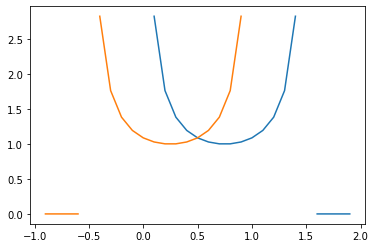

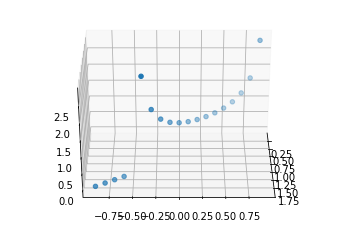

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<IPython.core.display.Javascript object>

In [51]:
from scipy.stats import entropy
from matplotlib import pyplot as plt 
temp=np.arange(0,2,0.1)
entropyval=[]

for i in range(len(temp)):
    entropyval.append(1/entropy([temp[i],1-temp[i]+0.5],base=2))
    
plt.plot(temp,entropyval)
plt.plot(1-temp,entropyval)


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') 
 

ax.scatter(temp, 1-temp, entropyval)

for angle in range(0, 360):
    ax.view_init(30, angle)
    plt.draw()
    plt.pause(.001)
